                               precision    recall  f1-score
Collaborative Filter Approach   0.379766  0.281193  0.323129
Cross Section Approach          0.664353  0.392928  0.493800
Panel Approach                  0.733281  0.587089  0.652091


/usr/local/lib/python3.7/site-packages/ipykernel_launcher.py:57: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only


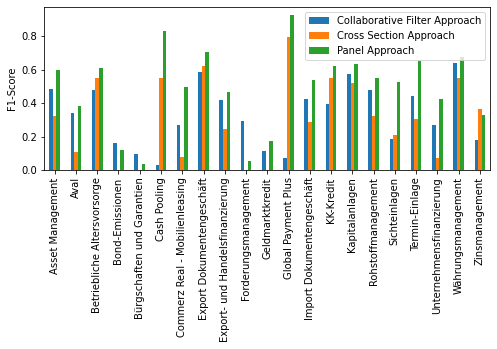

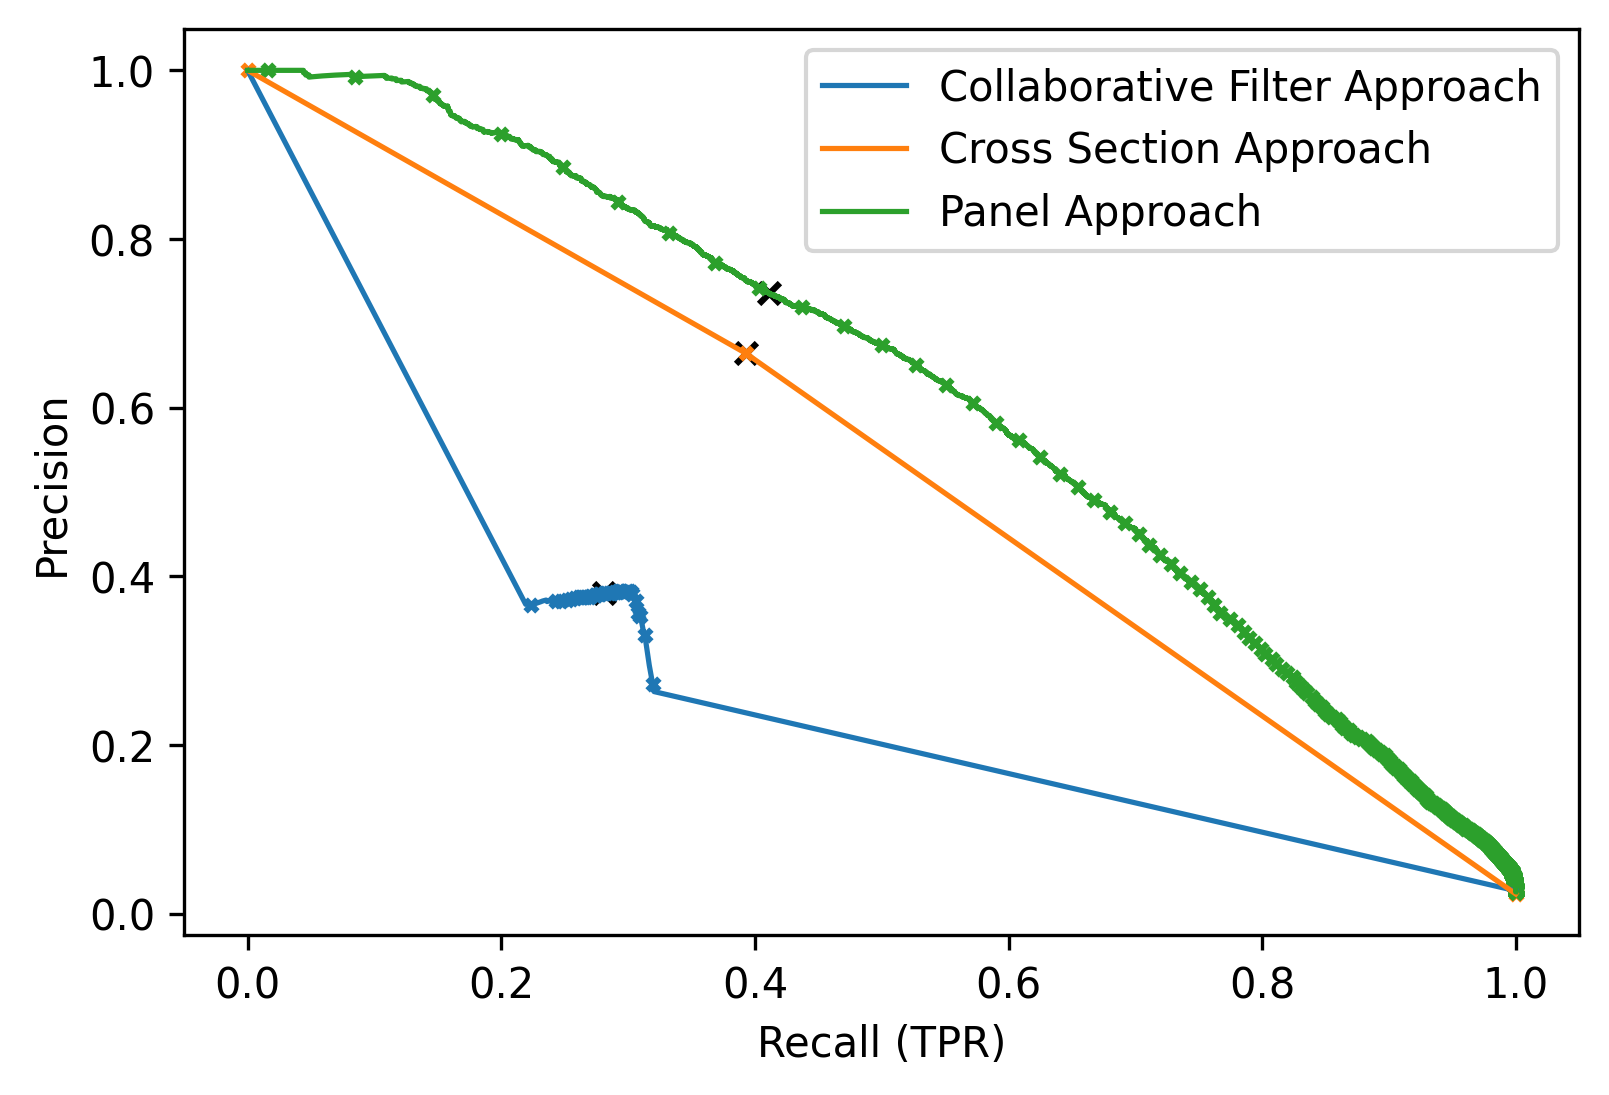

In [2]:
import pandas as pd
import matplotlib.pyplot as plt
from PanelInputDataGenerator import PanelInputDataGenerator
import numpy as np

#dashboard: export results
export = True

# load reports
classification_report_cf = pd.read_pickle(
    'classification_report_netflix_approach.pkl')
classification_report_cross_section_approach = pd.read_pickle(
    'classification_report_cross_section_approach.pkl')
classification_report_panel_approach = pd.read_pickle(
    'classification_report_panel_approach.pkl')

# load precision recall tradeoff results
pr_tradesoffs_micro_avg_netflix = pd.read_pickle(
    'netflix_pr_tradesoffs_micro_avg.pkl')
pr_tradesoffs_micro_avg_cross_section = pd.read_pickle(
    'cross_section_pr_tradesoffs_micro_avg.pkl')
pr_tradesoffs_micro_avg_panel = pd.read_pickle(
    'panel_pr_tradesoffs_micro_avg.pkl')

#key results table
approach_names = ["Collaborative Filter Approach","Cross Section Approach","Panel Approach"]
result_metrics = ['precision','recall','f1-score']#'pr_auc'
key_result_table = pd.DataFrame([classification_report_cf.loc['micro avg'][result_metrics],
classification_report_cross_section_approach.loc['micro avg'][result_metrics],
classification_report_panel_approach.loc['micro avg'][result_metrics]],index=approach_names)
print(key_result_table)
if export:
    with open("key_result_table.tex", "w") as text_file:
        text_file.write(key_result_table.style.format(precision=2, decimal='.', thousands=',').to_latex(
        caption="Main Results",hrules=True).replace('begin{table}', "begin{table}\n\centering"))
    
#detailed result tables per approach
if export:
    with open("classification_report_netflix_approach.tex", "w") as text_file:
        text_file.write(classification_report_cf.style.format(precision=2, decimal='.', thousands=',').to_latex(
        caption="Evalutation Netflix Approach",hrules=True).replace('begin{table}', "begin{table}\n\centering"))    
    with open("classification_report_cross_section_approach.tex", "w") as text_file:
        text_file.write(classification_report_cross_section_approach.style.format(precision=2, decimal='.', thousands=',').to_latex(
        caption="Evalutation Cross Section Approach",hrules=True).replace('begin{table}', "begin{table}\n\centering"))
    with open("classification_report_panel_approach.tex", "w") as text_file:
        text_file.write(classification_report_panel_approach.style.format(precision=2, decimal='.', thousands=',').to_latex(
        caption="Evalutation Panel Approach",hrules=True).replace('begin{table}', "begin{table}\n\centering"))

# f1 score per category per approach in one table (no export currently)
pd.DataFrame([classification_report_cf.loc[PanelInputDataGenerator.all_products]["f1-score"],
classification_report_cross_section_approach.loc[PanelInputDataGenerator.all_products]["f1-score"],
classification_report_panel_approach.loc[PanelInputDataGenerator.all_products]["f1-score"]],index=approach_names).T

#plot per product f1 score
f1_score_per_product_per_approach = pd.concat([classification_report_cf.loc[PanelInputDataGenerator.all_products][['f1-score']],
classification_report_cross_section_approach.loc[PanelInputDataGenerator.all_products][['f1-score']],
classification_report_panel_approach.loc[PanelInputDataGenerator.all_products][['f1-score']]],1)
f1_score_per_product_per_approach.columns = approach_names
ax_f1_per_product = f1_score_per_product_per_approach.plot(figsize=(8, 3),kind='bar')
ax_f1_per_product.set_ylabel("F1-Score")
if 1:
    ax_f1_per_product.get_figure().savefig("f1-Score per Product Group.png",dpi=300,bbox_inches='tight')

# plot avg pr tradeoff curve per approach
fig, ax = plt.subplots(dpi=300)
ax.plot(pr_tradesoffs_micro_avg_netflix["Recall"],pr_tradesoffs_micro_avg_netflix["Precision"],linewidth=1.25)
ax.plot(pr_tradesoffs_micro_avg_cross_section["Recall"],pr_tradesoffs_micro_avg_cross_section["Precision"],linewidth=1.25)
ax.plot(pr_tradesoffs_micro_avg_panel["Recall"],pr_tradesoffs_micro_avg_panel["Precision"],linewidth=1.25)
netflix_default_th = pr_tradesoffs_micro_avg_netflix.loc[min(pr_tradesoffs_micro_avg_netflix.index.tolist(), key=lambda x:abs(x-0.5))]
ax.scatter(netflix_default_th["Recall"],netflix_default_th["Precision"],s=25,marker='x',color='black')
cross_section_default_th = pr_tradesoffs_micro_avg_cross_section.loc[1]
ax.scatter(cross_section_default_th["Recall"],cross_section_default_th["Precision"],s=25,marker='x',color='black')
panel_default_th = pr_tradesoffs_micro_avg_panel.loc[min(pr_tradesoffs_micro_avg_panel.index.tolist(), key=lambda x:abs(x-0.5))]
ax.scatter(panel_default_th["Recall"],panel_default_th["Precision"],s=25,marker='x',color='black')
pr_tradesoffs_micro_avg_netflix = pr_tradesoffs_micro_avg_netflix.reset_index(drop=True).iloc[::25, :]
ax.scatter(pr_tradesoffs_micro_avg_netflix["Recall"],pr_tradesoffs_micro_avg_netflix["Precision"],s=8,marker='x')
ax.scatter(pr_tradesoffs_micro_avg_cross_section["Recall"],pr_tradesoffs_micro_avg_cross_section["Precision"],s=8,marker='x')
pr_tradesoffs_micro_avg_panel = pr_tradesoffs_micro_avg_panel.reset_index(drop=True).iloc[::500, :]
ax.scatter(pr_tradesoffs_micro_avg_panel["Recall"],pr_tradesoffs_micro_avg_panel["Precision"],s=8,marker="x")
ax.legend(approach_names)
plt.xlabel('Recall (TPR)')
plt.ylabel('Precision')
if export:
    fig.savefig("prtradeoffs.png",bbox_inches='tight')